In [1]:
import pandas as pd
import pywt
from sklearn.cluster import KMeans
import numpy as np


In [2]:
data= pd.read_csv('full_lv100_0801_ad.csv',encoding='utf-8')

In [18]:
binge_df= pd.read_csv('new_binge.csv',encoding='cp949')
binge_df=binge_df[['player_slug','binge']]

## Wavelet 방식 적용

In [4]:
# 웨이블릿 변환을 위한 데이터 선택 (2번 열부터 100번 열까지)
curves_data = data.iloc[:, 1:100].values  # 2번 열부터 100번 열까지 선택

# 각 곡선에 웨이블릿 변환 적용
coeffs = [pywt.wavedec(curve, 'db4', level=4) for curve in curves_data]
# 모든 웨이블릿 계수를 하나의 배열로 병합
coeffs_flat = np.array([np.concatenate(c) for c in coeffs])

# KMeans 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(coeffs_flat)

# 클러스터 레이블을 원본 데이터에 추가
data['cluster'] = labels

c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  warnings.warn(
c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


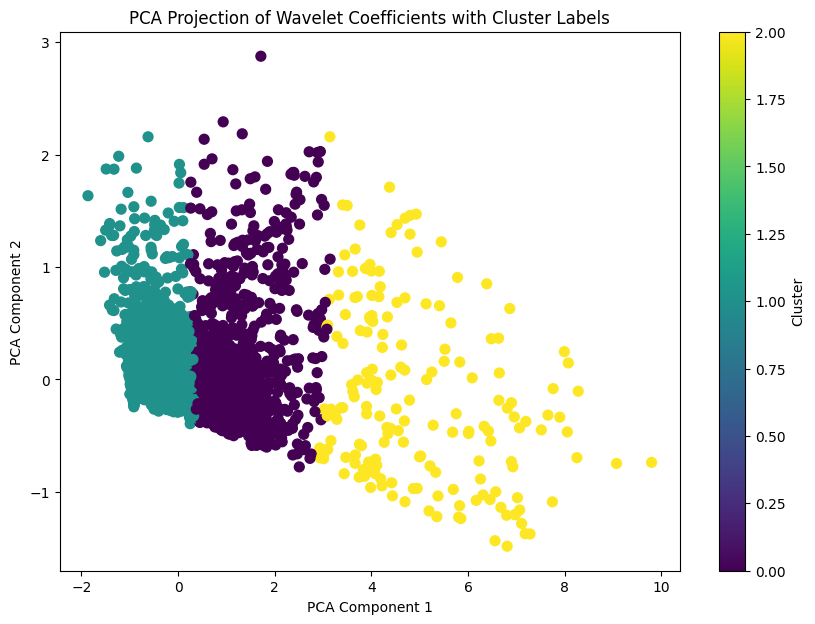

array([0.70322942, 0.06298914, 0.04724397])

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA를 사용하여 데이터를 2차원으로 축소
pca = PCA(n_components=3)
coeffs_pca = pca.fit_transform(coeffs_flat)

# 클러스터 결과를 2차원 공간에 시각화
plt.figure(figsize=(10, 7))
plt.scatter(coeffs_pca[:, 0], coeffs_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('PCA Projection of Wavelet Coefficients with Cluster Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# PCA 설명력 (Variance Explained)
explained_variance = pca.explained_variance_ratio_
explained_variance

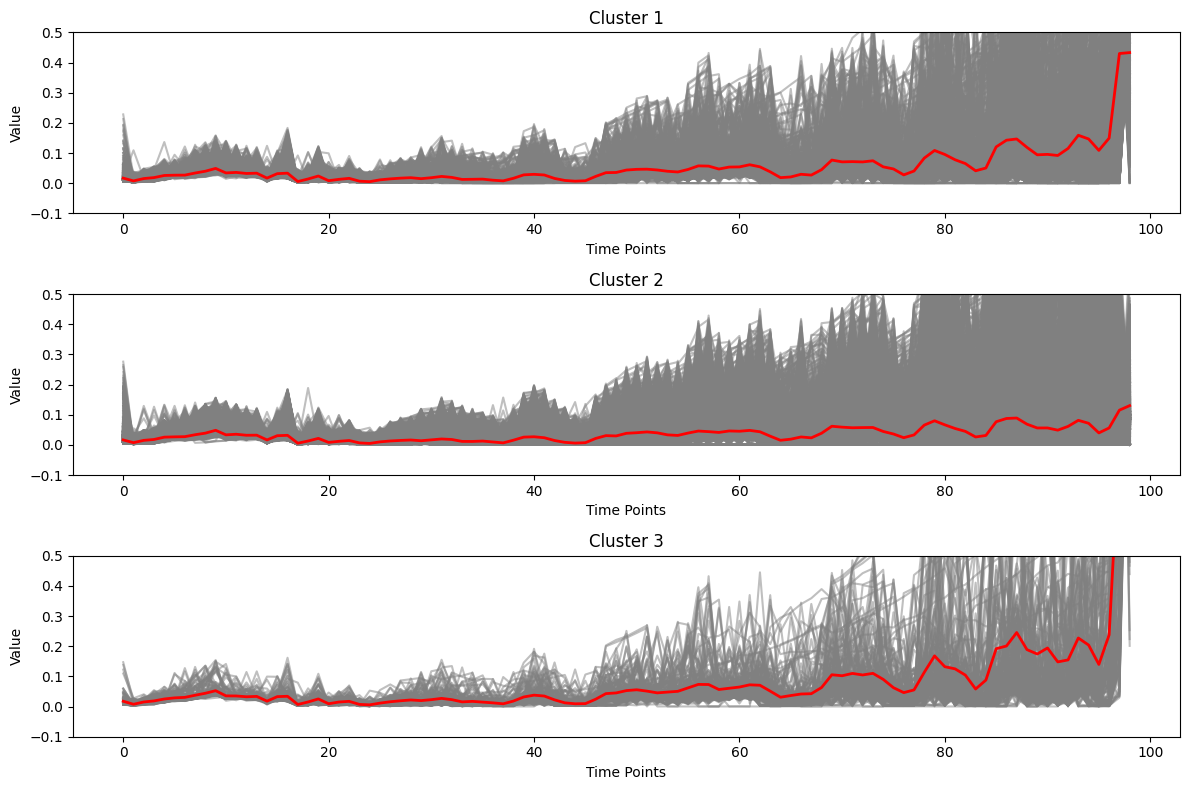

In [6]:
# 클러스터별 곡선 시각화
plt.figure(figsize=(12, 8))

for cluster in range(3):  # 각 클러스터에 대해 반복
    plt.subplot(3, 1, cluster + 1)
    for curve in curves_data[labels == cluster]:
        plt.plot(curve, color='gray', alpha=0.5)  # 개별 곡선
    plt.plot(curves_data[labels == cluster].mean(axis=0), color='red', linewidth=2)  # 평균 곡선
    plt.title(f'Cluster {cluster + 1}')
    plt.xlabel('Time Points')
    plt.ylabel('Value')
    plt.ylim(-0.1, 0.5)

plt.tight_layout()
plt.show()


In [7]:
data

,player_slug,2,3,4,5,6,7,8,9,10,...,94,95,96,97,98,99,100,total_ad,total_purchase,cluster
0,2021-11-01T08:32:01.518Z,0.019444,0.004167,0.009444,0.015833,0.015278,0.020833,0.026667,0.034167,0.044722,...,0.115556,0.152222,0.003333,0.003889,0.132667,0.906944,0.914500,0.0,0.0,2
1,2021-11-01T10:41:53.949Z,0.020556,0.004167,0.006111,0.006667,0.019722,0.021389,0.023056,0.030278,0.032778,...,0.123833,0.095833,0.157500,0.002500,0.127944,0.401944,0.514722,28.0,0.0,0
2,2021-11-01T14:12:34.729Z,0.015833,0.004444,0.030278,0.013889,0.028056,0.020000,0.021389,0.026389,0.032778,...,0.011667,0.064500,0.351111,0.041611,0.111389,0.002222,0.001944,0.0,0.0,1
3,2021-11-01T15:01:02.831Z,0.007778,0.003056,0.006389,0.009722,0.012500,0.049722,0.070833,0.036222,0.032500,...,0.043944,0.236111,0.036111,0.002778,0.126667,0.121111,0.135556,0.0,0.0,1
4,2021-11-01T15:10:02.121Z,0.006944,0.003611,0.010833,0.015000,0.023056,0.022778,0.022500,0.048333,0.031667,...,0.004167,0.199111,0.065222,0.024167,0.003333,0.070611,0.250556,2.0,3300.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7274,2022-03-28T00:01:33.666Z,0.006667,0.003333,0.008333,0.013889,0.019444,0.021667,0.021111,0.024722,0.030278,...,0.021389,0.090556,0.083333,0.002222,0.002222,0.036444,0.600833,2.0,3300.0,0
7275,2022-03-28T07:44:40.201Z,0.006944,0.003056,0.005833,0.012500,0.012500,0.021667,0.021389,0.027222,0.036944,...,0.674444,0.759722,0.876389,0.136778,0.171667,0.043056,0.067500,0.0,0.0,1
7276,2022-03-28T11:06:23.113Z,0.006389,0.005278,0.012222,0.021944,0.031389,0.026667,0.024722,0.033889,0.035556,...,0.020278,0.081389,0.080000,0.002778,0.002778,0.071167,0.149722,0.0,122100.0,1
7277,2022-03-29T09:29:33.653Z,0.031389,0.031111,0.047222,0.029722,0.037778,0.020556,0.023778,0.026111,0.032222,...,0.046389,0.049167,0.002778,0.002778,0.023444,0.093333,0.102778,6.0,0.0,1


In [8]:
df_unique = binge_df.drop_duplicates(subset=['player_slug'])
df_unique

,player_slug,binge
0,2021-10-31T16:01:57.631Z,1
6,2021-10-31T23:13:52.512Z,0
15,2021-11-01T00:29:22.357Z,0
21,2021-11-01T03:34:17.980Z,0
28,2021-11-01T05:12:15.383Z,0
...,...,...
2466886,2022-03-30T13:53:30.032Z,0
2466934,2022-03-30T14:09:03.502Z,0
2466945,2022-03-30T14:13:23.546Z,0
2466966,2022-03-30T14:20:04.049Z,0


In [9]:
merged_df = data.merge(df_unique, on='player_slug', how='left')
merged_df

,player_slug,2,3,4,5,6,7,8,9,10,...,95,96,97,98,99,100,total_ad,total_purchase,cluster,binge
0,2021-11-01T08:32:01.518Z,0.019444,0.004167,0.009444,0.015833,0.015278,0.020833,0.026667,0.034167,0.044722,...,0.152222,0.003333,0.003889,0.132667,0.906944,0.914500,0.0,0.0,2,1
1,2021-11-01T10:41:53.949Z,0.020556,0.004167,0.006111,0.006667,0.019722,0.021389,0.023056,0.030278,0.032778,...,0.095833,0.157500,0.002500,0.127944,0.401944,0.514722,28.0,0.0,0,1
2,2021-11-01T14:12:34.729Z,0.015833,0.004444,0.030278,0.013889,0.028056,0.020000,0.021389,0.026389,0.032778,...,0.064500,0.351111,0.041611,0.111389,0.002222,0.001944,0.0,0.0,1,1
3,2021-11-01T15:01:02.831Z,0.007778,0.003056,0.006389,0.009722,0.012500,0.049722,0.070833,0.036222,0.032500,...,0.236111,0.036111,0.002778,0.126667,0.121111,0.135556,0.0,0.0,1,1
4,2021-11-01T15:10:02.121Z,0.006944,0.003611,0.010833,0.015000,0.023056,0.022778,0.022500,0.048333,0.031667,...,0.199111,0.065222,0.024167,0.003333,0.070611,0.250556,2.0,3300.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7274,2022-03-28T00:01:33.666Z,0.006667,0.003333,0.008333,0.013889,0.019444,0.021667,0.021111,0.024722,0.030278,...,0.090556,0.083333,0.002222,0.002222,0.036444,0.600833,2.0,3300.0,0,1
7275,2022-03-28T07:44:40.201Z,0.006944,0.003056,0.005833,0.012500,0.012500,0.021667,0.021389,0.027222,0.036944,...,0.759722,0.876389,0.136778,0.171667,0.043056,0.067500,0.0,0.0,1,1
7276,2022-03-28T11:06:23.113Z,0.006389,0.005278,0.012222,0.021944,0.031389,0.026667,0.024722,0.033889,0.035556,...,0.081389,0.080000,0.002778,0.002778,0.071167,0.149722,0.0,122100.0,1,1
7277,2022-03-29T09:29:33.653Z,0.031389,0.031111,0.047222,0.029722,0.037778,0.020556,0.023778,0.026111,0.032222,...,0.049167,0.002778,0.002778,0.023444,0.093333,0.102778,6.0,0.0,1,1


In [20]:
# Cluster별로 그룹화하여 'binge' 열의 비율을 계산
binge_ratios = merged_df.groupby('cluster')['binge'].value_counts(normalize=True).unstack()

# 결과 확인
print(binge_ratios)


binge           0         1
cluster                    
0        0.459481  0.540519
1        0.494166  0.505834
2        0.366667  0.633333


: 

In [11]:
binge_number = merged_df.groupby('cluster')['binge'].value_counts().unstack()

# 결과 확인
print(binge_number)

binge       0     1
cluster            
0         584   687
1        2880  2948
2          66   114


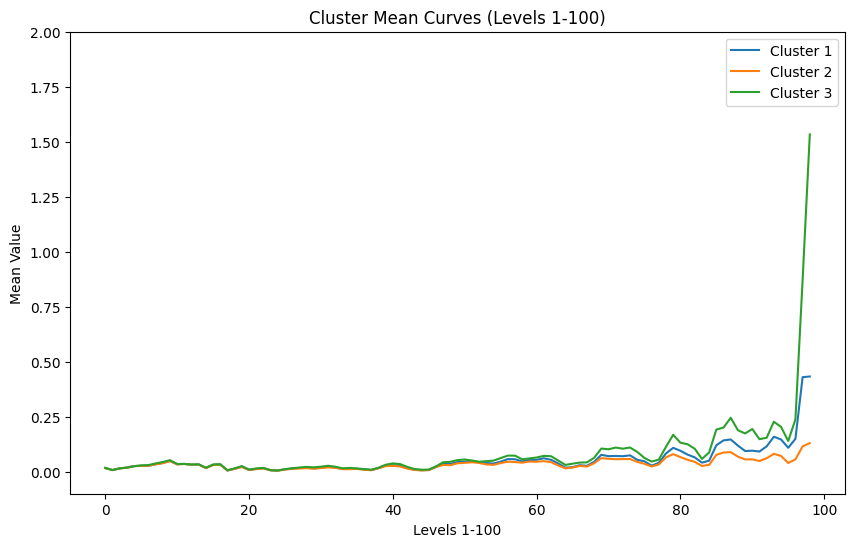

In [12]:
# 클러스터별 평균 곡선을 하나의 그래프로 시각화
plt.figure(figsize=(10, 6))

for cluster in range(3):  # 각 클러스터에 대해 반복
    mean_curve = curves_data[labels == cluster].mean(axis=0)
    plt.plot(mean_curve, label=f'Cluster {cluster + 1}')

plt.title('Cluster Mean Curves (Levels 1-100)')
plt.xlabel('Levels 1-100')
plt.ylabel('Mean Value')
plt.ylim(-0.1, 2)  # 필요시 Y축 범위 조정
plt.legend()
plt.show()

## LOESS 사용

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data= pd.read_csv('full_lv100_0801_ad.csv',encoding='utf-8')
irrelevant_columns = ['total_ad', 'total_purchase']
relevant_columns = [col for col in data.columns if col not in irrelevant_columns]
curves_data = data[relevant_columns].iloc[:, 1:100].values  # 2번 열부터 100번 열까지


c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


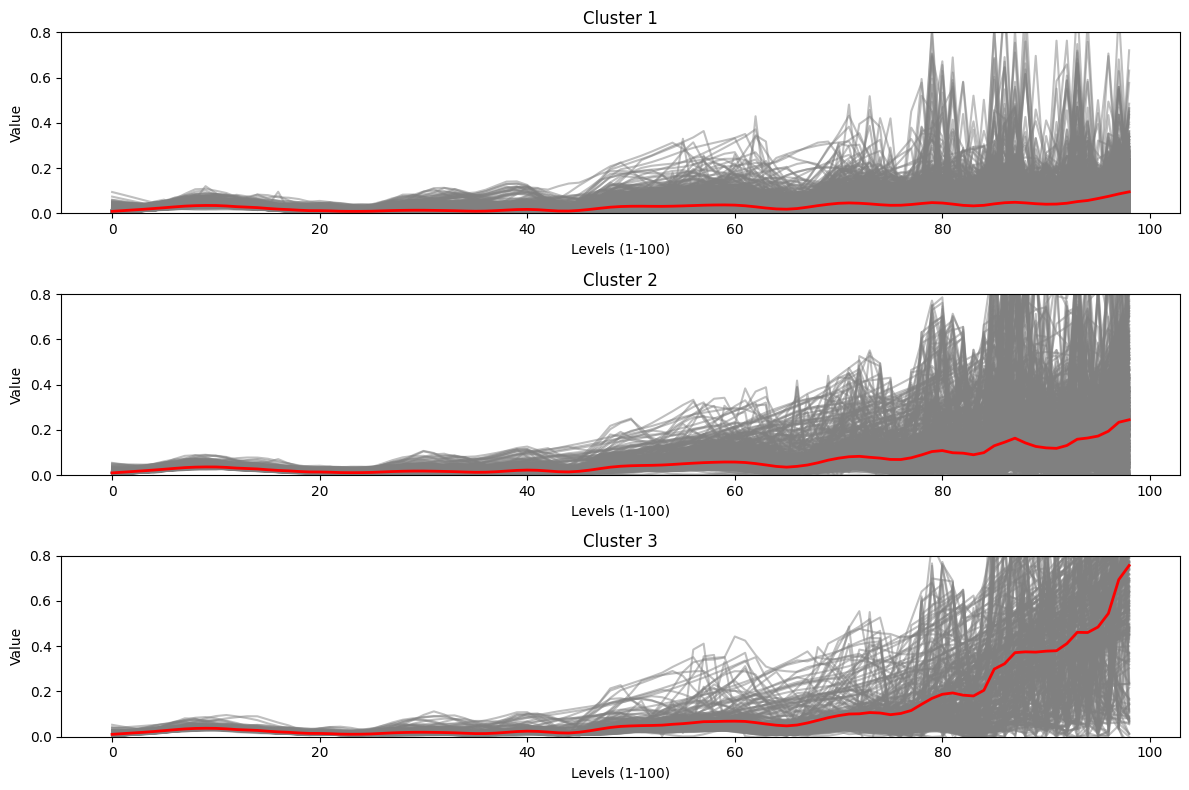

In [94]:
# LOESS 적용 함수 정의
def apply_loess(curve, frac=0.1):
    """
    curve: 원본 곡선 데이터 (1차원 배열)
    frac: LOESS에서 사용하는 로컬 윈도우 크기 (0에서 1 사이의 값)
    """
    x = np.arange(len(curve))  # x축 데이터 포인트 생성 (1, 2, 3, ..., N)
    loess_result = sm.nonparametric.lowess(curve, x, frac=frac)  # LOESS 적용
    return loess_result[:, 1]  # 평활화된 y값 반환

# 각 곡선에 LOESS 적용
loess_curves = np.array([apply_loess(curve, frac=0.1) for curve in curves_data])

# KMeans 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=42)
labels_loess = kmeans.fit_predict(loess_curves)
data['cluster'] = labels_loess

# 클러스터 결과 시각화
plt.figure(figsize=(12, 8))

for cluster in range(3):  # 각 클러스터에 대해 반복
    plt.subplot(3, 1, cluster + 1)
    for curve in loess_curves[labels_loess == cluster]:  # 해당 클러스터의 곡선들을 그리기
        plt.plot(curve, color='gray', alpha=0.5)
    plt.plot(loess_curves[labels_loess == cluster].mean(axis=0), color='red', linewidth=2)  # 평균 곡선
    plt.title(f'Cluster {cluster + 1}')
    plt.xlabel('Levels (1-100)')
    plt.ylabel('Value')
    plt.ylim(0, 0.8)  # 필요시 Y축 범위 조정

plt.tight_layout()
plt.show()

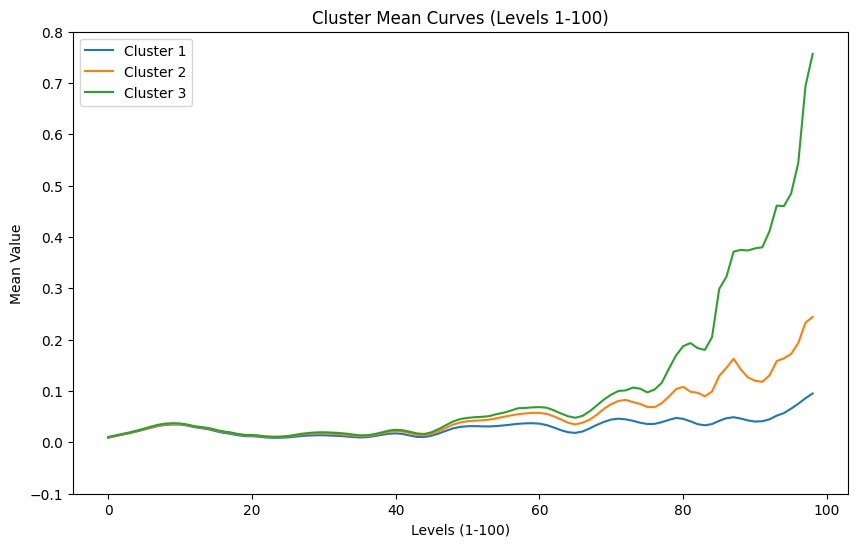

In [95]:
# 클러스터별 평균 곡선을 하나의 그래프로 시각화
plt.figure(figsize=(10, 6))

for cluster in range(3):  # 각 클러스터에 대해 반복
    mean_curve = loess_curves[labels_loess == cluster].mean(axis=0)
    plt.plot(mean_curve, label=f'Cluster {cluster + 1}')

plt.title('Cluster Mean Curves (Levels 1-100)')
plt.xlabel('Levels (1-100)')
plt.ylabel('Mean Value')
plt.ylim(-0.1, 0.8)  # 필요시 Y축 범위 조정
plt.legend()
plt.show()

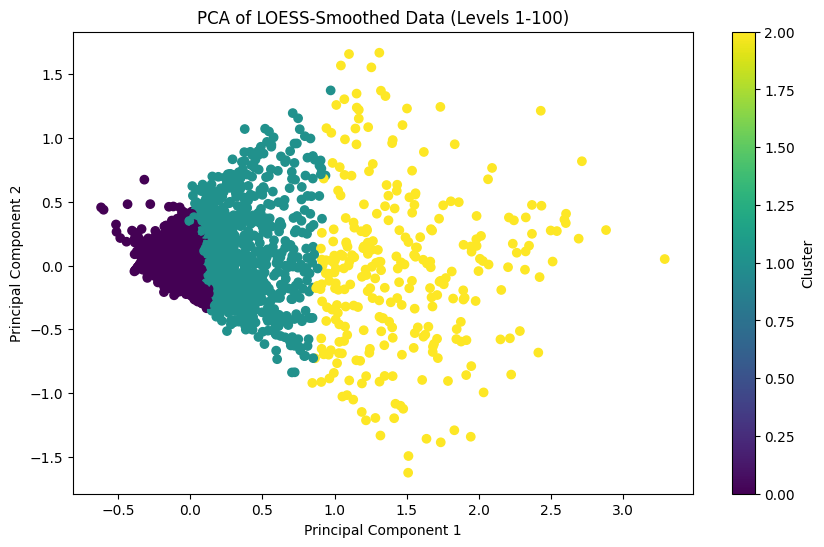

Explained Variance by Component 1: 0.49
Explained Variance by Component 2: 0.15


In [96]:
# PCA 분석 수행
pca = PCA(n_components=2)
pca_result = pca.fit_transform(loess_curves)

# PCA 결과 시각화 (클러스터별)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels_loess, cmap='viridis')
plt.title('PCA of LOESS-Smoothed Data (Levels 1-100)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

# PCA 설명력 (Variance Explained)
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Component 1: {explained_variance[0]:.2f}")
print(f"Explained Variance by Component 2: {explained_variance[1]:.2f}")

In [97]:
df_unique = binge_df.drop_duplicates(subset=['player_slug'])
df_unique
merged_df = data.merge(df_unique, on='player_slug', how='left')
merged_df
# Cluster별로 그룹화하여 'binge' 열의 비율을 계산
binge_ratios = merged_df.groupby('cluster')['binge'].value_counts(normalize=True).unstack()

# 결과 확인
print(binge_ratios)
binge_number = merged_df.groupby('cluster')['binge'].value_counts().unstack()

# 결과 확인
print(binge_number)

binge           0         1
cluster                    
0        0.495403  0.504597
1        0.462087  0.537913
2        0.359155  0.640845
binge       0     1
cluster            
0        2910  2964
1         518   603
2         102   182


c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\

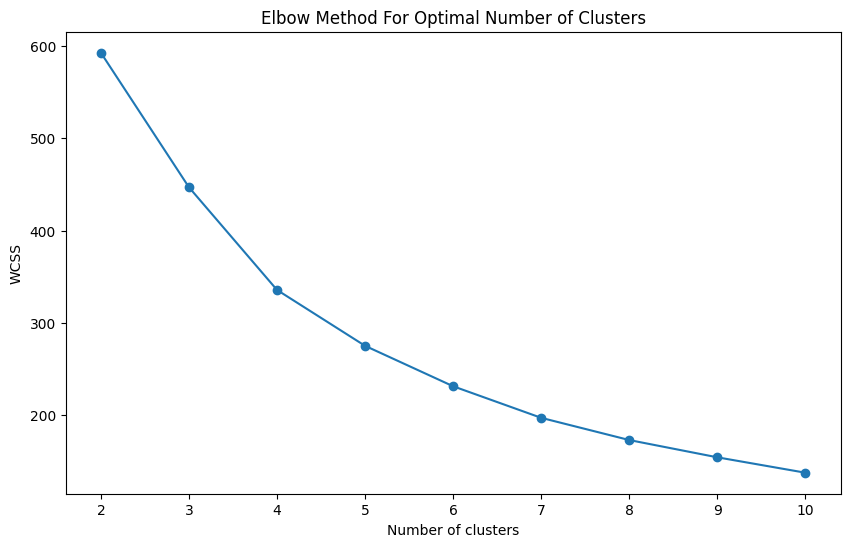

In [63]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\

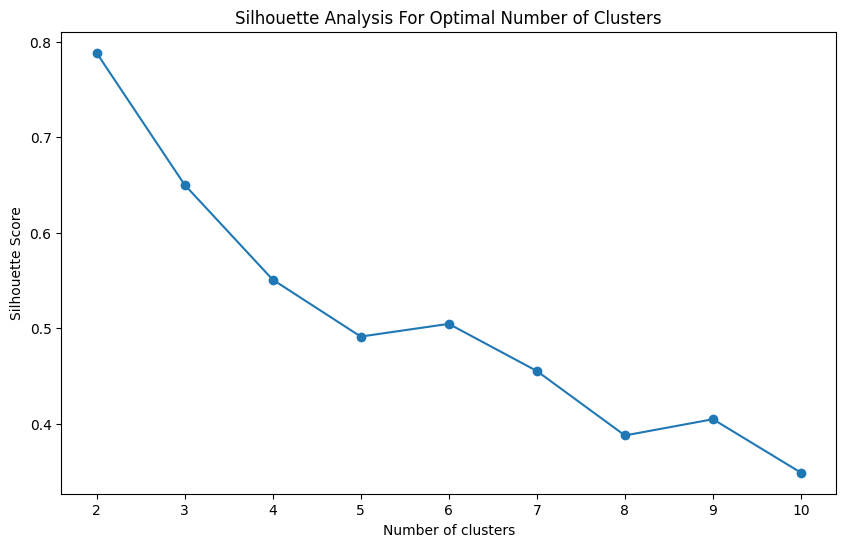

In [34]:
from sklearn.metrics import silhouette_score


# Silhouette Analysis - 최적의 클러스터 수 분석
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(pca_result)
    silhouette_scores.append(silhouette_score(pca_result, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()